# Case Study 2 : Analyzing data from MovieLens
** Due Date: March 5, 2016 5:59PM**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [7]:
from IPython.lib.display import YouTubeVideo

In [10]:
YouTubeVideo('6O43gOxtaWo', start=14)

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Helen Hong
    
    Haley Huang
   
    Tom Meagher
    
    Tyler Reese

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6 Pg 171-172,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to Chapter 1 of Python for Data Analysis book above.

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Users Data
unames = ['user_id','gender','age','occupation','zip']
users = pd.read_table('users.dat', sep = '::', header = None, names = unames,engine='python')
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
# Import Ratings Data
rnames = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_table('ratings.dat', sep = '::', header = None, names = rnames,engine='python')
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# Import movies Data
mnames = ['movie_id','title','genres']
movies = pd.read_table('movies.dat', sep = '::', header = None, names = mnames,engine='python')
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Merge the data into a single data frame
data = pd.merge(pd.merge(ratings,users),movies)
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
#Store the data into an HDF5 file
data_hdf = pd.HDFStore('movie_h5')
data_hdf['data1'] = data
data_hdf.close()

How many movies have an average rating over 4.5 overall?

In [9]:
# Use a pivot table to compute mean ratings by title
mean_ratings = data.pivot_table('rating',index = 'title',aggfunc = 'mean')

# Determine titles with high mean ratings
top_overall_titles = mean_ratings.index[mean_ratings >= 4.5]

#Extract those titles
top_overall_movies = mean_ratings.ix[top_overall_titles]
print 'Total movies with an average ranking of (at least) 4.5 overall:' 
print len(top_overall_movies)
print
print 'Examples:'
print top_overall_movies[:5]

Total movies with an average ranking of (at least) 4.5 overall:
29

Examples:
title
Apple, The (Sib) (1998)                4.666667
Baby, The (1973)                       5.000000
Bells, The (1926)                      4.500000
Bittersweet Motel (2000)               5.000000
Callej�n de los milagros, El (1995)    4.500000
Name: rating, dtype: float64


How many movies have an average rating over 4.5 among men? How about women?

In [10]:
# Use a pivot table to compute mean ratings per title, stratified by gender.
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

#Determine those title ranked high among females.
top_female_titles = mean_ratings.index[mean_ratings['F'] >= 4.5]

# Extract those titles
top_female_movies = mean_ratings.ix[top_female_titles]
print 'Total movies with an average ranking of (at least) 4.5 among women:' 
print len(top_female_movies)
print
print 'Examples (average rankings):'
print top_female_movies[:5]

Total movies with an average ranking of (at least) 4.5 among women:
70

Examples (average rankings):
gender                                 F         M
title                                             
24 7: Twenty Four Seven (1997)  5.000000  3.750000
Among Giants (1998)             4.666667  3.333333
Aparajito (1956)                4.666667  3.857143
Apple, The (Sib) (1998)         4.750000  4.600000
Arguing the World (1996)        4.500000  3.777778


In [11]:
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

# Determine which titles had high average ratings among men
top_male_titles = mean_ratings.index[mean_ratings['M'] >= 4.5]

# Extract those titles
top_male_movies = mean_ratings.ix[top_male_titles]
print 'Total movies with an average ranking of (at least) 4.5 among men:' 
print len(top_male_movies)
print
print 'Examples (average rankings):'
print top_male_movies[:5]

Total movies with an average ranking of (at least) 4.5 among men:
29

Examples (average rankings):
gender                                  F    M
title                                         
Angela (1995)                        3.00  5.0
Apple, The (Sib) (1998)              4.75  4.6
Baby, The (1973)                      NaN  5.0
Bells, The (1926)                    4.00  5.0
Callej�n de los milagros, El (1995)   NaN  4.5


How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?

In [12]:
# Restrict data to those with raters aged over 30
data_over30 = data.ix[data['age']>30]

# Use a pivot table to compute the median ratings by title on this restricted data
median_ratings = data_over30.pivot_table('rating',index = 'title',columns = ['gender'],aggfunc = 'median')

In [13]:
# Determine which movies had a high median among men and extract those titles
top_male_median_titles = median_ratings.index[median_ratings['M'] >= 4.5]
top_male_median_movies = median_ratings.ix[top_male_median_titles]

print 'Total movies with an median ranking of (at least) 4.5 among men over 30:' 
print len(top_male_median_movies)
print
print 'Examples, median scores among people over 30:'
print top_male_median_movies[:5]

Total movies with an median ranking of (at least) 4.5 among men over 30:
105

Examples, median scores among people over 30:
gender                                 F  M
title                                      
42 Up (1998)                           4  5
All Quiet on the Western Front (1930)  4  5
American Beauty (1999)                 4  5
Among Giants (1998)                    5  5
Angela (1995)                          3  5


In [14]:
# Determine which movies had a high median among men and extract those titles
top_female_median_titles = median_ratings.index[median_ratings['F'] >= 4.5]
top_female_median_movies = median_ratings.ix[top_female_median_titles]

print 'Total movies with an median ranking of (at least) 4.5 among women over 30:' 
print len(top_female_median_movies)
print
print 'Examples, median scores among people over 30:'
print top_female_median_movies[:5]

Total movies with an median ranking of (at least) 4.5 among women over 30:
187

Examples, median scores among people over 30:
gender                                            F   M
title                                                  
24 7: Twenty Four Seven (1997)                  5.0   3
400 Blows, The (Les Quatre cents coups) (1959)  5.0   4
Above the Rim (1994)                            4.5   3
Across the Sea of Time (1995)                   5.0 NaN
African Queen, The (1951)                       5.0   4


What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.

We propose the following definition of a "Popular" movie:
* Above-average total number of ratings
* Above-average rating among women (i.e. the movie's average rating among women is above the average of ALL ratings given by women)
* Above-average rating among men ((i.e. the movie's average rating among men is above the average of ALL ratings given by men)

Among these "popular" movies we determine the top 10 MOST popular by using highest average rating overall.

In [19]:
# Determine the overall total ratings and mean ratings per title
popularity_test = data.pivot_table('rating',index = 'title', aggfunc = [len, np.mean])

# Determine the mean ratings per title by gender
gender_popularity_test = data.pivot_table('rating',index = 'title', columns = 'gender', aggfunc = np.mean)

popularity_test[:5]

,len,mean
title,,
"$1,000,000 Duck (1971)",37,3.027027
'Night Mother (1986),70,3.371429
'Til There Was You (1997),52,2.692308
"'burbs, The (1989)",303,2.910891
...And Justice for All (1979),199,3.713568


In [20]:
gender_popularity_test[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [21]:
# Calculate total number of ratings for each title
ratings_by_title = data.groupby('title').size()

# Determine the average number of total ratings
average_total_ratings = sum(ratings_by_title)/len(ratings_by_title)

# Determine which titles had above average total ratings and isolate those titles.
high_total_titles = popularity_test.index[popularity_test['len'] >= average_total_ratings]
high_total = popularity_test.ix[high_total_titles]

high_total[:5]

,len,mean
title,,
"'burbs, The (1989)",303,2.910891
10 Things I Hate About You (1999),700,3.422857
101 Dalmatians (1961),565,3.596460
101 Dalmatians (1996),364,3.046703
12 Angry Men (1957),616,4.295455


In [22]:
# Determine the average of ALL ratings given by men and by women.
gender_average_ratings = data.pivot_table('rating', index = 'gender',aggfunc = np.mean)
gender_average_ratings

gender
F    3.620366
M    3.568879
Name: rating, dtype: float64

In [23]:
# Determine the titles with above average female ratings and isolate those titles among the movies with above average total ratings.
high_female_titles = gender_popularity_test.index[gender_popularity_test['F'] >= gender_average_ratings['F']]
high_total_female = high_total.ix[high_female_titles]

# Among the above isolated titles, determine those with above average male ratings and isolate those titles.
high_male_titles = gender_popularity_test.index[gender_popularity_test['M'] >= gender_average_ratings['M']]
high_total_female_male = high_total_female.ix[high_male_titles]

In [24]:
# Determine the popular movies, given the definition above.
from numpy import nan as NA
popular_movies = high_total_female_male.dropna(how = 'all')
popular_movies[:5]

,len,mean
title,,
12 Angry Men (1957),616,4.295455
"20,000 Leagues Under the Sea (1954)",575,3.702609
2001: A Space Odyssey (1968),1716,4.068765
"Abyss, The (1989)",1715,3.683965
"Adventures of Priscilla, Queen of the Desert, The (1994)",469,3.805970


In [25]:
# Given the popluar movies, determine the 10 most popular.
most_popular_movies = popular_movies.sort_values(by='mean',ascending = False)
most_popular_movies[:10]

,len,mean
title,,
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),628,4.560510
"Shawshank Redemption, The (1994)",2227,4.554558
"Godfather, The (1972)",2223,4.524966
"Close Shave, A (1995)",657,4.520548
"Usual Suspects, The (1995)",1783,4.517106
Schindler's List (1993),2304,4.510417
"Wrong Trousers, The (1993)",882,4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),470,4.491489
Raiders of the Lost Ark (1981),2514,4.477725


Make some conjectures about how easy various groups are to please? Support your answers with data!

Conjecture 1.) The older a person gets, the more difficult they are to please.

In [27]:
# Compute average rating by age group
age_avg_ratings = data.pivot_table('rating', index = 'age',aggfunc = np.mean)
age_avg_ratings

age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64

In [28]:
# Compute weighted average by weighting each rating by the total number of ratings that individual submits
avg_by_user = data.pivot_table('rating',index = ['age','user_id'], aggfunc = [ len , np.mean])
avg_by_user[:10]

avg_ratings = np.mean(avg_by_user['len'])

avg_by_user['weight'] = avg_by_user['len']/avg_ratings
avg_by_user['weighted_mean'] = avg_by_user['mean']*avg_by_user['weight']

age_avg_weighted_ratings = avg_by_user.pivot_table('weighted_mean', index = avg_by_user.index.droplevel(1), aggfunc = np.mean)
age_avg_weighted_ratings

age
1     2.627286
18    3.524510
25    4.040247
35    3.644629
45    3.340652
50    3.278268
56    2.321259
Name: weighted_mean, dtype: float64

In [29]:
# Compute average age per rating
avg_age_ratings = data.pivot_table('age', index = 'rating',aggfunc = np.mean)
avg_age_ratings

rating
1    27.411756
2    28.607603
3    29.730035
4    30.154405
5    30.221130
Name: age, dtype: float64

Conclusion: False.  In fact, an older person is mor likely than a younger person to give a rating of 5.  More details presented in the report.

Conjecture 2.) Tired people are more easy to please

In [30]:
import time
timestamps = data['timestamp']

# Time stamps are reported in seconds since epoch.  Convert these values to local time, and extract the hour.
hour = [time.localtime(stamp).tm_hour for stamp in timestamps.values]
hour_series = pd.DataFrame(hour, index=data.index)

# Append the hour each rating was reported to the data set.
data['hour'] = hour_series

In [31]:
# Use a pivot table to determine the average overall rating by hour.
avg_by_hour = data.pivot_table('rating',index = 'hour', aggfunc = np.mean)
avg_by_hour

hour
0     3.532635
1     3.527360
2     3.531431
3     3.602150
4     3.547933
5     3.573614
6     3.557967
7     3.547619
8     3.605558
9     3.572180
10    3.604116
11    3.616663
12    3.581185
13    3.603956
14    3.600098
15    3.584636
16    3.596764
17    3.566583
18    3.588092
19    3.603550
20    3.579090
21    3.557242
22    3.612470
23    3.580279
Name: rating, dtype: float64

Conclusion: False.  If the conjecture were true, we would expect to see noticeably higher average ratings at very large and very small hours.  This is clearly not the case.

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [2]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [32]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Make a scatter plot of men versus women and their mean rating for every movie.

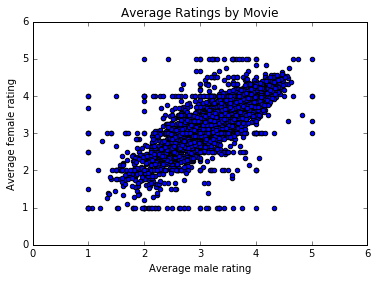

In [33]:
# Use a pivot table to compute mean ratings per title by gender
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

# Scatter this data.
plt.scatter(mean_ratings['M'], mean_ratings['F'])
plt.title('Average Ratings by Movie')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.

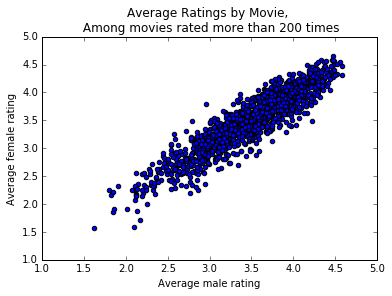

In [34]:
# Determine titles with more than 200 total ratings.
ratings_by_title = data.groupby('title').size()
active_titles = ratings_by_title.index[ratings_by_title > 200]

# Extract these titles
over_200_mean_ratings = mean_ratings.ix[active_titles]

#Produce scatter plot
plt.scatter(over_200_mean_ratings['M'], over_200_mean_ratings['F'])
plt.title('Average Ratings by Movie, \n Among movies rated more than 200 times')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!

In [38]:
# Compute the correlation coefficient
print 'correlation coefficient between averege male and female ratings: {0}'.format(mean_ratings.M.corr(mean_ratings.F))

correlation coefficient between averege male and female ratings 0.763189890858


In [39]:
# Based on scatter plots above, it is clear that men and women tend to agree more when the movies have a higher total number
# of ratings.  Calculate the correlation coeffcient in this case
print 'correlation coefficient between averege male and female ratings among movies with over 200 ratings: {0}'.format(
    over_200_mean_ratings.M.corr(over_200_mean_ratings.F))

correlation coefficient between averege male and female ratings among movies with over 200 ratings: 0.918361385703


In [40]:
# Given this observed in crease in correlation coefficient, we now compute the correlation coefficient based on the number of 
# total ratings:
ratings_by_title = data.groupby('title').size()
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

i = 1
IND = ['0']
RAT = [0]
while i < max(ratings_by_title):
    titles = ratings_by_title.index[np.logical_and(ratings_by_title >= i, ratings_by_title < 2*i)]
    subset_mean_ratings = mean_ratings.ix[titles]
    correl = subset_mean_ratings.M.corr(subset_mean_ratings.F)
    IND.append('Total ratings between {0} and {1}'.format(i, 2*i))
    RAT.append(correl)
    j = i
    i = 2*j

correl_comp = pd.Series(RAT, index=IND)
correl_comp.index.name = 'Total number of Ratings'
correl_comp.name = 'Correlation coefficient between average Male and Female Ratings per Movie'

correl_comp

Total number of Ratings
0                                      0.000000
Total ratings between 1 and 2               NaN
Total ratings between 2 and 4          0.398274
Total ratings between 4 and 8          0.343599
Total ratings between 8 and 16         0.515807
Total ratings between 16 and 32        0.573141
Total ratings between 32 and 64        0.786651
Total ratings between 64 and 128       0.867470
Total ratings between 128 and 256      0.916493
Total ratings between 256 and 512      0.924317
Total ratings between 512 and 1024     0.880580
Total ratings between 1024 and 2048    0.852633
Total ratings between 2048 and 4096    0.850174
Name: Correlation coefficient between average Male and Female Ratings per Movie, dtype: float64

Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

Conjecture 1.) People rate more similarly when they are tired.

In [41]:
import time

# Convert time stamps to local time and extract the hour.
timestamps = data['timestamp']
hour = [time.localtime(stamp).tm_hour for stamp in timestamps.values]
hour_series = pd.DataFrame(hour, index=data.index)
data['hour'] = hour_series

In [42]:
# Isolate data for ratings submitted between 10PM and 5AM local time
wee_hours_data = data[np.logical_or(data['hour']>= 22,data['hour']<=5)]

# Determine the average ratings per title by gender during these late-night hours.
wee_hours_mean_ratings = wee_hours_data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = np.mean)

wee_hours_mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",2.666667,3.000000
'Night Mother (1986),3.285714,3.666667
'Til There Was You (1997),2.750000,2.875000
"'burbs, The (1989)",2.956522,2.887097
...And Justice for All (1979),3.615385,3.613636


In [43]:
#Calculate the correlation coefficient.
print 'Correlation coefficient between averege male and female ratings between 10PM and 5AM: {0}'.format(
    wee_hours_mean_ratings.M.corr(wee_hours_mean_ratings.F))

Correlation coefficient between averege male and female ratings between 10PM and 5AM: 0.644369631647


In [44]:
# We already know that men and women tend to disagree on movies with lower total ratings. Segment from the late-night data those with
# high total numbers of ratings.
wee_hours_over_200_mean_ratings = wee_hours_mean_ratings.ix[active_titles]
wee_hours_over_200_mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.956522,2.887097
10 Things I Hate About You (1999),3.693333,3.392857
101 Dalmatians (1961),3.780000,3.540984
101 Dalmatians (1996),3.216216,2.866667
12 Angry Men (1957),4.218750,4.307692


In [48]:
#Compute Correlation Coefficient
'Correlation coefficient between averege male and female ratings between 10PM and 5AM, among movies with at least 200 total ratings: {0}'.format(wee_hours_over_200_mean_ratings.M.corr(wee_hours_over_200_mean_ratings.F))

'Correlation coefficient between averege male and female ratings between 10PM and 5AM, among movies with at least 200 total ratings: 0.865430264315'

Conclusion: False.  Both correlation coefficients actually went down by about 0.1

Conjecture 2.) People of a similar age rate similarly

In [49]:
# Use a pivot table to calculate mean ratings per title by gender and age
age_mean_ratings = data.pivot_table('rating', index = 'age', columns = 'gender', aggfunc = 'mean')
age_mean_ratings[:10]

gender,F,M
age,,
1,3.616291,3.517461
18,3.453145,3.525476
25,3.606700,3.526780
35,3.659653,3.604434
45,3.663044,3.627942
50,3.797110,3.687098
56,3.915534,3.720327


In [50]:
# Calculate the correlation coefficient.
age_mean_ratings.M.corr(age_mean_ratings.F)

0.90127597368018997

Improvement!  This is a larger correlation coefficient than the overall average, by about 0.15.  Perhaps more tests than just correlation coefficient should be performed to support this conjecture.

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  Convince your boss that your conjecture is correct!

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 2".